In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3

In [42]:
conn = sqlite3.connect('../db.sqlite3')
cur = conn.cursor()

query = '''
SELECT * 
FROM base_quadra
'''

df = pd.read_sql(query, con = conn)

cur.close()
conn.close()

df.head()

,tipo,rua,CEP,cidade,estado,alugada,telefone,estrelas,valor_hora,horario_abertura,horario_fechamento,descricao
0,Vôlei,Viaduto João Gabriel Pinto,97342-658,Vieira,PA,0,21 3197-9558,1,43,8,16,Cerveja gelada
1,Futsal,Lagoa Dias,19286197,Ramos dos Dourados,SP,1,+55 31 1446 9531,0,7,8,17,Cerveja gelada
2,Futsal,Passarela das Neves,77459-359,Fogaça,RO,0,(061) 6147 6958,3,15,11,16,Cerveja gelada
3,Vôlei,Estação Davi Lucas Viana,85868269,Nogueira,PB,1,+55 (061) 1002-8002,4,31,9,16,Localização ótima
4,Basquete,Setor Nunes,36396214,Monteiro de Martins,MA,1,+55 (081) 5686 7143,0,14,7,19,Espaço fechado


In [43]:
flt = df[['estado', 'descricao', 'estrelas', 'valor_hora']]
agrupado = flt.groupby(['estado']).mean().reset_index()
agrupado.head(10)

,estado,estrelas,valor_hora
0,AC,2.636364,26.909091
1,AL,4.000000,21.571429
2,AM,3.000000,26.200000
3,AP,1.750000,21.750000
4,BA,3.571429,33.142857
5,CE,1.636364,21.545455
6,DF,2.666667,31.444444
7,ES,2.400000,28.200000
8,GO,2.230769,29.307692
9,MA,2.000000,24.500000


<AxesSubplot:ylabel='estado'>

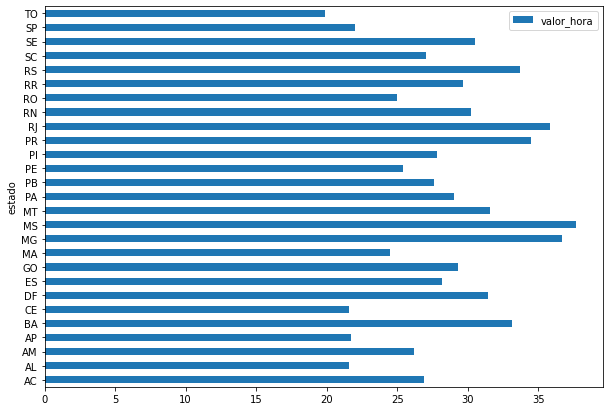

In [44]:
agrupado.plot.barh(x = 'estado', y = 'valor_hora', figsize=(10,7))